In [1]:
import numpy as np
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
class LinearRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

In [3]:
# from regression import LinearRegression

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [4]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [5]:
print(X.shape)

(100, 1)


In [6]:
print(y.shape)

(100,)


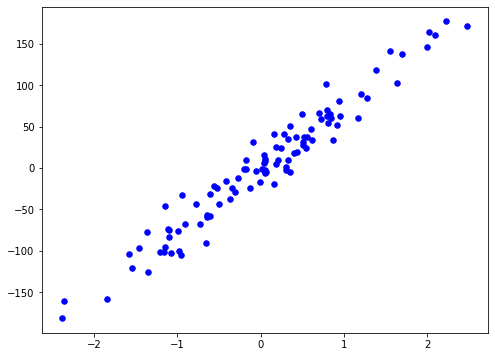

In [7]:
# Inspect data
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show()

In [8]:
regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

In [9]:
print(predictions)

[  90.07616325   65.22041584  -45.69264845  -82.48790623   20.93884211
  -73.92169888  -14.9088548   151.65264231   14.01725303 -102.2910724
   15.56846563   41.60341884   26.20273534   38.12032261   37.38270397
  -37.35622388  -83.12304575   26.30377956   38.1309002    29.45253316]


In [10]:
print(y_test)

[  89.5978923    33.21708479  -58.51318402  -82.91713341   40.69772522
 -100.73717846   -1.65856494  163.94385144    5.26394625  -77.78704394
    9.20267903   36.86598297   -5.54348338   31.43120085   64.53968736
  -44.1299115   -74.76820338   50.92876904   28.14443518   17.68768961]


In [11]:
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

MSE: 305.7719958301902


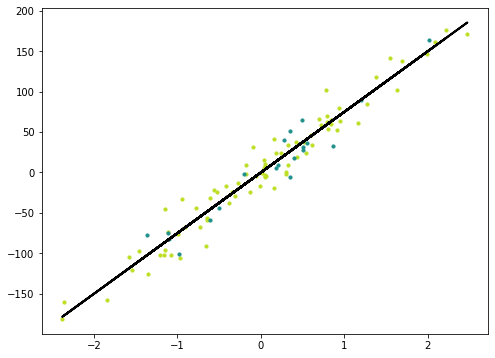

In [12]:
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="Prediction")
plt.show()